# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 1 - Regresión Logística
# Notebook #1: Análisis de datos

En esta primera notebook, se realiza un análisis exploratorio de los datos, observando estadísticamente cómo se comportan las variables o características empleadas para la clasificación.
El objetivo es, a partir de este análisis, determinar a qué punto es necesario filtrar los datos del conjunto de datos original, y además, ver estadísticamente qué comportamiento tienen las variables para determinar cómo esa información puede ser útil para mejorar los modelos propuestos.
### Integrantes del grupo
* Kammann, Lucas Agustín
* Gaytan, Joaquín Oscar

# 1. Descripción del problema
Se busca desarrollar un clasificador para poder predecir la aparición de diabetes en un individuo a partir de ciertos valores diagnósticos. Dicha clasificación se realiza a partir del Pima Indians Diabetes Dataset, perteneciente al National Institute of Diabetes and Digestive and Kidney Diseases. Esta base de datos comprende pacientes femeninos de al menos 21 años de edad, de herencia Pima Indian.

Las características o variables a tener en cuenta como entrada del modelo son las siguientes,

*   Pregnancies (embarazos): Número de embarazos
*   Glucose: Concentración de glucosa en sangre a 2 horas de una prueba de tolerancia de glucosa oral.
*   BloodPresure (Presión sanguinea): Presión diastólica (mm Hg)
*   SkinThickness: Tamaño del pliegue de la piel del triceps
*   Insulin: Insulina en sangre a 2 horas (mu U/ml)
*   BMI: Indice de masa corporal (peso en kg / (altura en metros)^2)
*   DiabetesPedigreeFunction: Una función que estima el likelihood de tener diabetes dado el historial familiar
*   Age: Edad (años)
*   Outcome: Variable 0 o 1 (0 no posee diabetes, 1 posee diabetes)

No se tiene información a priori sobre la distribución de probabilidad con la cual cada una de estas variables aleatorias se encuentra correctamente modelada, no obstante, se trabajara cada una de ellas según corresponda como una variable aleatorias continua o discreta, modelando su función masa de probabilidad o su función densidad de probabilidad.


# 2. Esquema de clasificación
Para la clasificación de la diabetes, se emplea el modelo de regresión logística. A diferencia del primer trabajo práctico, en este caso el modelo es **discriminativo**. En otras palabras, esto significa que no se asume conocimiento ni se supone la distribución real de cada variable respecto a la condición de enfermo.

# 3. Análisis de los datos
El **EDA** o **Exploratory Data Analysis**, es un procedimiento por el cual se busca analizar cómo es el conjunto de datos que se empleará para el entrenamiento, la validación y la evaluación de los modelos. Por un lado, el objetivo de este análisis consiste en extraer información útil sobre cómo se deben limpiar los datos, aplicar dicha limpieza y preparar correctamente la información para ser utilizada con los modelos.
Por otro lado, el análisis estadístico de este procedimiento aporta información útil y relevante sobre las variables del problema, los vínculos que estas tienen entre sí y con el resultado, y cómo se encuentran distribuídas. De esta forma, se puede utilizar este conocimiento para mejorar o indagar modelos que exploten las características observadas.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

## 3.1. Importando base de datos
En primer lugar, se importa la base de datos y se muestran los primeros datos en ella.

In [4]:
# Read database from .csv
df = pd.read_csv('../../databases/diabetes.csv', delimiter=',')

# Show first rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3.2. Filtrado de valores
En la base de datos se pueden encontrar valores que son inválidos según la interpretación física de la variable diagnóstico, y es necesario removerlos o limpiarlos para poder hacer un análisis estadístico preciso que los ignore. Para lograr esto, se reemplazan todos los valores considerados inválidos en cada variable, por algo conocido como **nan** o **not a number**.
Esto permite que los algoritmos y librerías aplicadas, sepan ignorar esas entradas de la base de datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De la tabla anterior se aprecia que hay ciertas variables biológicas que adoptan valores inválidos. Por ejemplo, la presión arterial no puede ser nula. Lo mismo sucede con el nivel de glucosa, el grosor de la piel, el nivel de insulina, el índice de masa corporal. Luego, se reemplazan aquellos valores sin sentido por un NaN (not a number) para evitar que sean contemplados al realizar el análisis estadístico posterior, preservando los parámetros de las distribuciones.

In [7]:
# Filtering Glucose values
df['Glucose'].replace(0, np.nan, inplace=True)

# Filtering Blood Pressure values
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Filtering Skin Thickness values
df['SkinThickness'].replace(0, np.nan, inplace=True)

# Filtering Insulin values
df['Insulin'].replace(0, np.nan, inplace=True)

# Filtering Body Mass Index values
df['BMI'].replace(0, np.nan, inplace=True)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Otra opción para eliminar aquellos datos inválidos podría haber sido conservar solo aquellas muestras que contengan sólo datos válidos. La principal desventaja de esto es que se reduciría drásticamente el tamaño del dataset, perdiendo una gran cantidad de información, mientras que de esta forma sólo se reducen las muestras de variables individualmente.

Esto último, se puede observar a continuación, donde se visualiza la *cantidad de valores nulos o ignorados* en cada variable.

In [9]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## 3.3. Distribución de clases

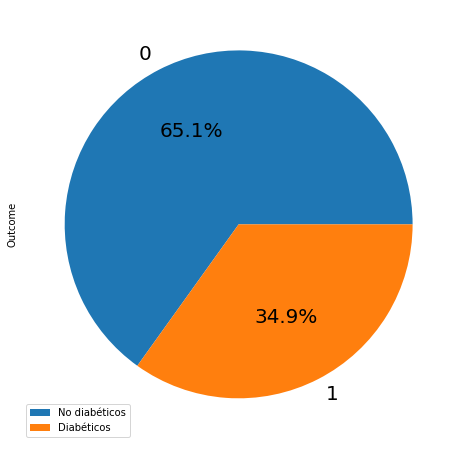

In [10]:
# Plot the class distribution
plot = df['Outcome'].value_counts().plot(
    kind='pie', 
    autopct="%.1f%%", 
    fontsize=20, 
    figsize=(8, 8),
    use_index=False
)
plt.legend([f'No diabéticos', f'Diabéticos'], loc="lower left")
plt.show()

## 3.4. Análisis de variables
Para cada variable involucrada se realiza un análisis estadístico, que consiste en observar el histograma de la variable en general, y la variable condicionada a que el individuo posea o no diabetes. Además, se hace un gráfico boxplot, para observar la presencia de outliers que puedan afectar a la distribución.

In [11]:
from src.helper import analyze_variable
from src.helper import get_outliers
from src.helper import remove_outliers

In [12]:
import seaborn as sns

In [13]:
sns.set_theme(context='notebook', font_scale=1.4)

### 3.4.1. Embarazos
En esta variable diagnóstico, se puede observar que la distribución condicionada a si posee o no diabetes, cambia de un caso a otro, particularmente cuando no hay diabetes se observa una distribución unimodal, mientras que cuando posee diabetes se puede distinguir levemente una distribución bimodal.

Además, los datos poseen algunos valores que se alejan de la mayoria de las muestras, y son considerados outliers que deben removerse para que no afecten a la parametrización de la distribución.

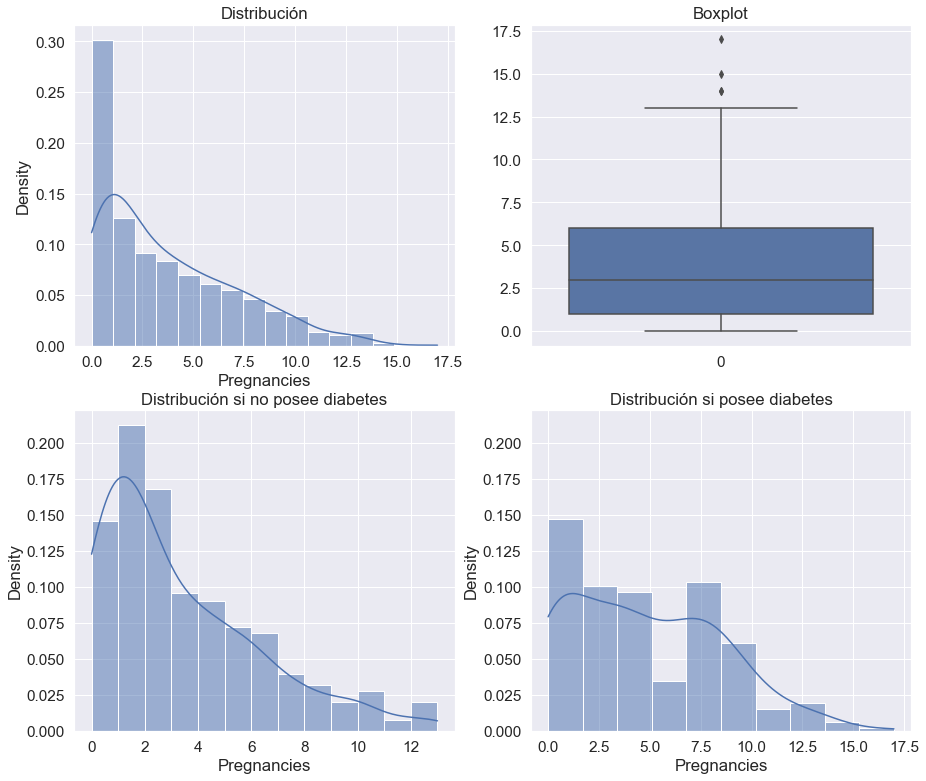

In [14]:
analyze_variable(df, 'Pregnancies')

In [15]:
outliers = get_outliers(df, 'Pregnancies')

In [16]:
print(outliers)

[15, 17, 14, 14]


In [17]:
remove_outliers(df, 'Pregnancies')

### 3.4.2. Glucosa
Se puede observar que la distribución está fuertemente afectada por la condición de si posee o no diabetes la persona diagnosticada, particularmente cuando no posee diabetes se puede considerar que esta variable posee una distribución gaussiana unimodal, mientras que cuando posee diabetes la distribución deja de ser gaussiana y es bimodal.

En los datos recopilados no existen outliers para remover.

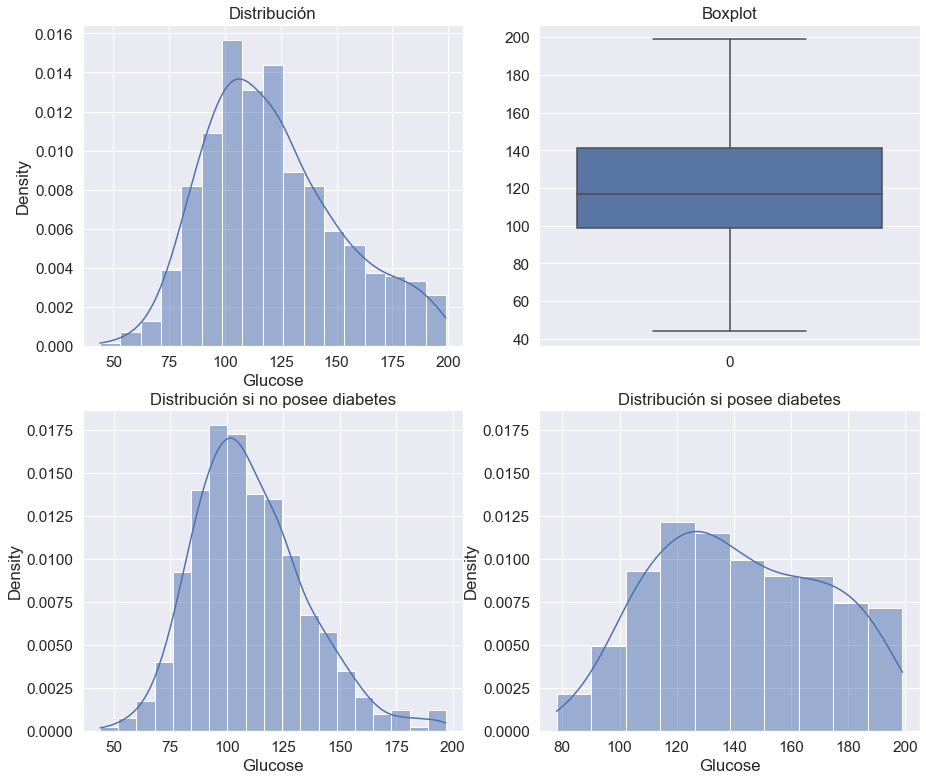

In [18]:
analyze_variable(df, 'Glucose')

In [19]:
outliers = get_outliers(df, 'Glucose')

In [20]:
print(outliers)

[]


In [21]:
remove_outliers(df, 'Glucose')

### 3.4.3. Presión Arterial
En este caso en particular, el efecto de que el paciente posea o no diabetes, no afecta tan marcadamente la distribución de la variable al igual que en casos anteriores. Ambas condiciones tienen distribuciones similares a la gaussiana, y son muy parecidas entre sí.

La variable posee muchos outliers que serán removidas para poder estimar con mejor precisión la media y el desvío estándar.

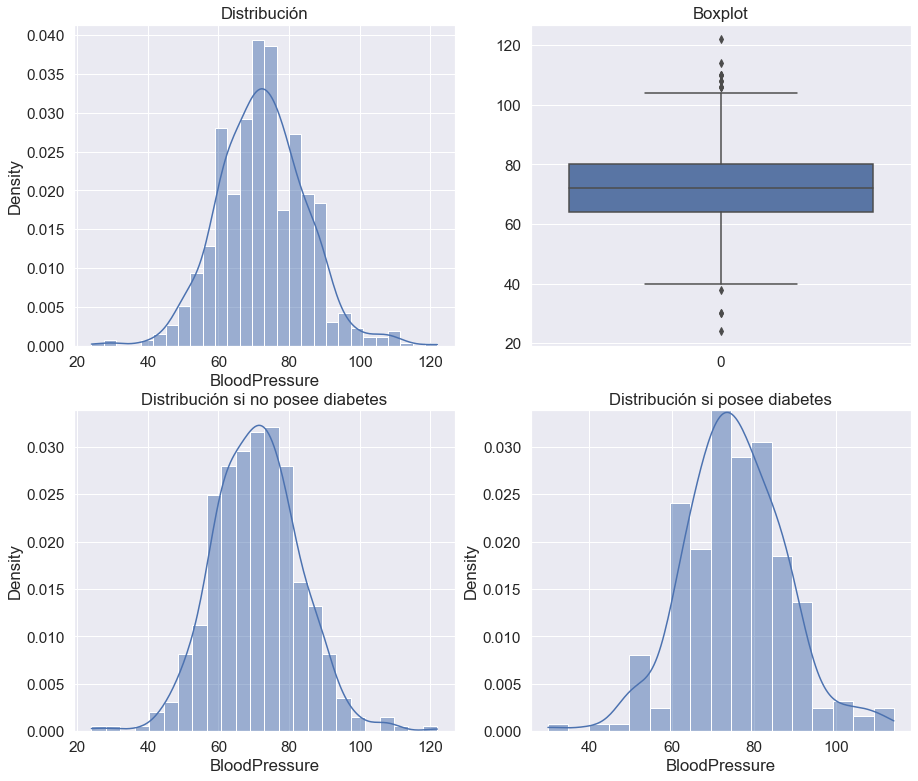

In [22]:
analyze_variable(df, 'BloodPressure')

In [23]:
outliers = get_outliers(df, 'BloodPressure')

In [24]:
print(outliers)

[30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 108.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]


In [25]:
remove_outliers(df, 'BloodPressure')

### 3.4.4. Grosor de la piel del pliegue del tríceps
En esta variable, se podría pensar que existen tres valores de tendencia central para la variable, fuertemente marcados en la distribución cuando el paciente no posee diabetes, mientras que para aquellas personas que poseen diabetes, el cambio en la distribución se refleja en la presencia de una única tendencia central marcada.

No posee outliers para remover.

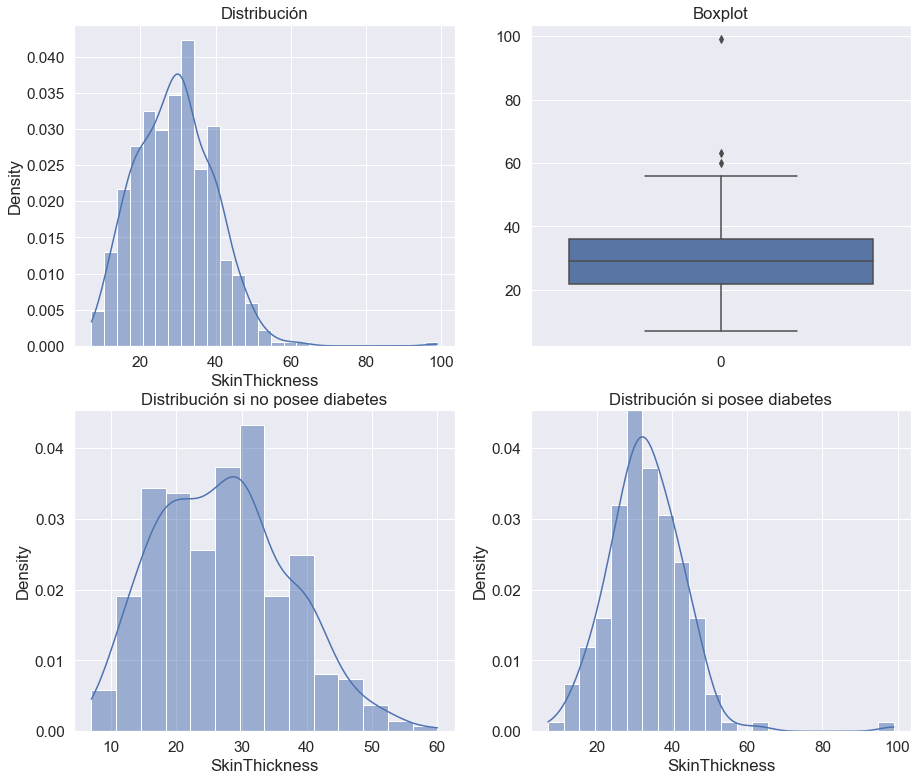

In [26]:
analyze_variable(df, 'SkinThickness')

In [27]:
outliers = get_outliers(df, 'SkinThickness')

In [28]:
print(outliers)

[60.0, 63.0, 99.0]


In [29]:
remove_outliers(df, 'SkinThickness')

### 3.4.5. Insulina

Esta variable particularmente tiene dos tendencias centrales, podría considerarse una distribución bimodal, aunque una de ellas se encuentra más presente en los casos de estudio que la otra. La distribución se podría considerar aproximadamente gaussiana.

Posee muchos outliers que se necesitan remover para estimar los parámetros de la distribución con mayor precisión.

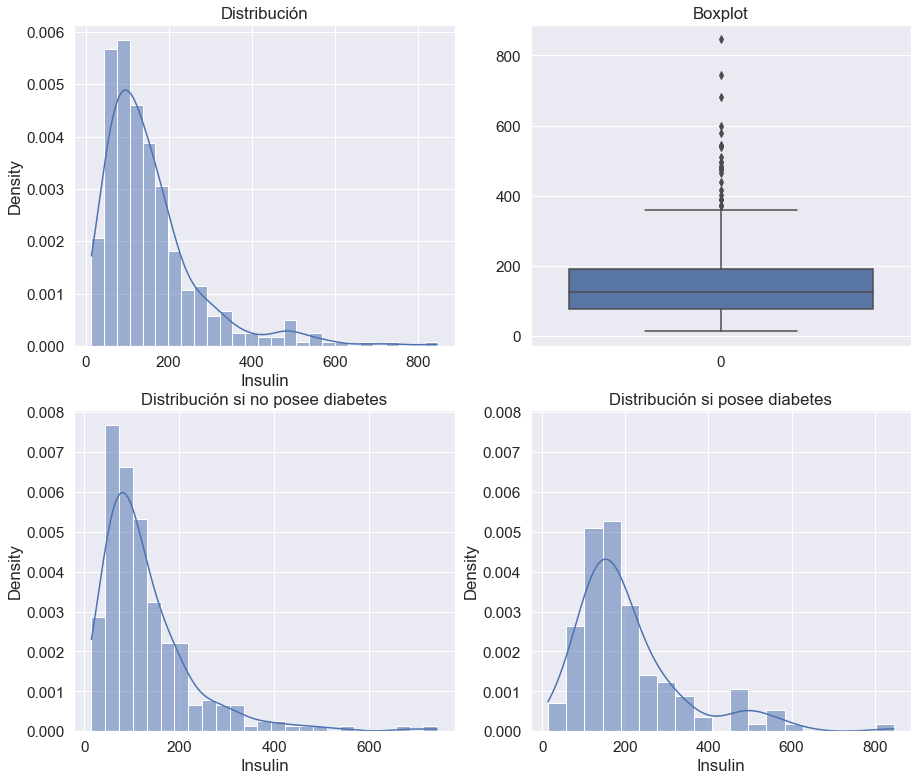

In [30]:
analyze_variable(df, 'Insulin')

In [31]:
outliers = get_outliers(df, 'Insulin')

In [32]:
print(outliers)

[543.0, 846.0, 495.0, 485.0, 495.0, 478.0, 744.0, 370.0, 680.0, 402.0, 375.0, 545.0, 465.0, 415.0, 579.0, 474.0, 480.0, 600.0, 440.0, 540.0, 480.0, 387.0, 392.0, 510.0]


In [33]:
remove_outliers(df, 'Insulin')

### 3.4.6. Índice de Masa Corporal
En principio, se puede observar que para ambas condiciones la distribución es bimodal, presenta dos tendencias centrales aunque una de ellas con mayor presencia que la otra. En particular, la diferencia más marcada entre una condición y la otra, es un desplazamiento de las tendencias.

Los datos poseen outliers para remover.

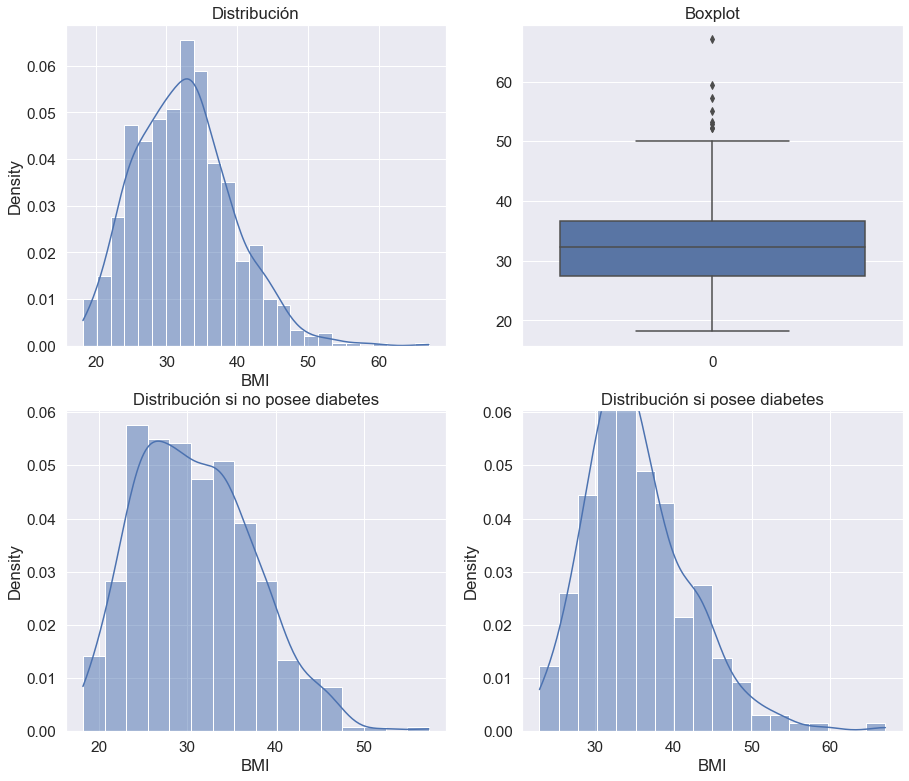

In [34]:
analyze_variable(df, 'BMI')

In [35]:
outliers = get_outliers(df, 'BMI')

In [36]:
print(outliers)

[53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]


In [37]:
remove_outliers(df, 'BMI')

### 3.4.7. Diabetes Pedigree Function

Se observa en las distribuciones condicionadas que la forma no cambia drásticamente en función de si posee diabetes o no, sólamente cambia la escala de la misma, por ende se podría considerar que no aporta demasiada información de clasificación.

Los datos poseen muchos outliers que hay que remover.

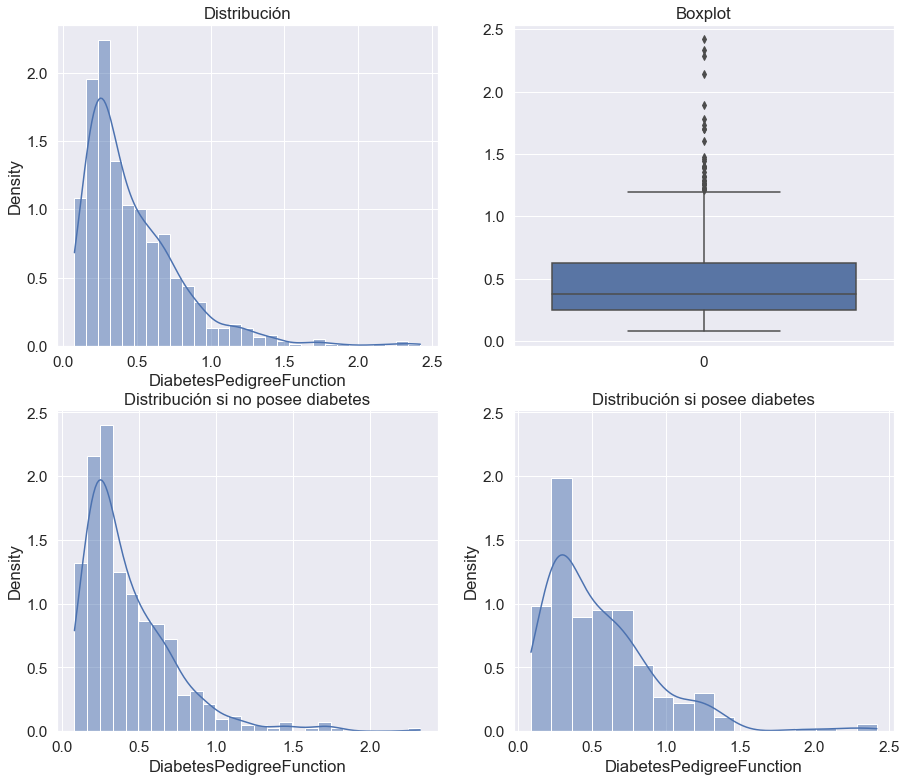

In [38]:
analyze_variable(df, 'DiabetesPedigreeFunction')

In [39]:
outliers = get_outliers(df, 'DiabetesPedigreeFunction')

In [40]:
print(outliers)

[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


In [41]:
remove_outliers(df, 'DiabetesPedigreeFunction')

### 3.4.8. Edad

En esta distribución, cuando se comparan las formas y valores para el caso donde la persona posee o no diabetes, cambia la densidad acumulada en torno a la moda o tendencia central que más presencia posee cuando se trata de una persona sin diabetes.

Los datos tienen outliers, es necesario removerlos.

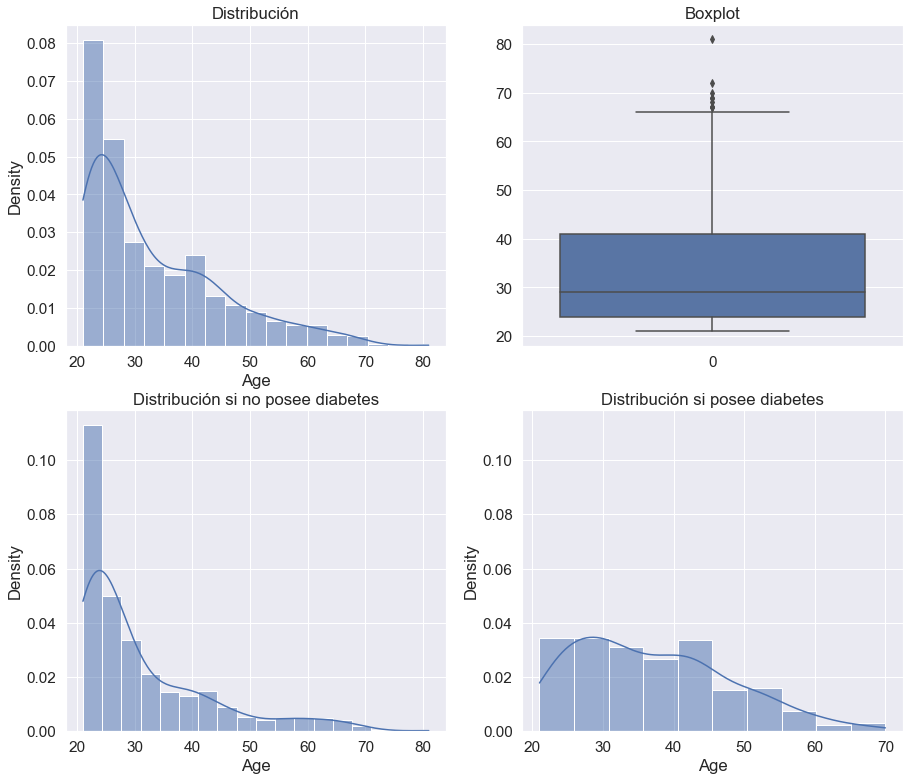

In [42]:
analyze_variable(df, 'Age')

In [43]:
outliers= get_outliers(df, 'Age')

In [44]:
print(outliers)

[69, 67, 72, 81, 67, 67, 70, 68, 69]


In [45]:
remove_outliers(df, 'Age')

## 3.5. Correlación entre variables
La **correlación** se puede interpretar como el grado de relación lineal que guardan dos variables, y cuando se poseen N variables, la correlación cruzada entre cada una par da lugar a la **matriz de correlación**. Esto se puede utilizar para analizar de forma intuitiva qué información aporta sobre una variable, conocer otra variable.

Se busca identificar aquellas variables que tengan un alto grado de correlación. En este caso, se podría prescindir de una de ellas para realizar la clasificación dado que a mayor correlación, la información que aporta alguna de las dos variables disminuye dado el conocimiento de la otra. Además, es de interés ver la correlación con el resultado del diagnóstico, para ver cuánto impacto tienen algunas variables.

#### Observaciones
* Se observa un alto grado de correlación entre las variables SkinThickness y BMI
* Se observa un alto grado de correlación entre las variables Insulin y Glucose
* Se observa un alto grado de correlación entre las variables Pregnancies y Age
* Se observa un alto grado de correlación entre los niveles de glucosa y si posee o no diabetes

In [46]:
corr_matrix = df.corr()

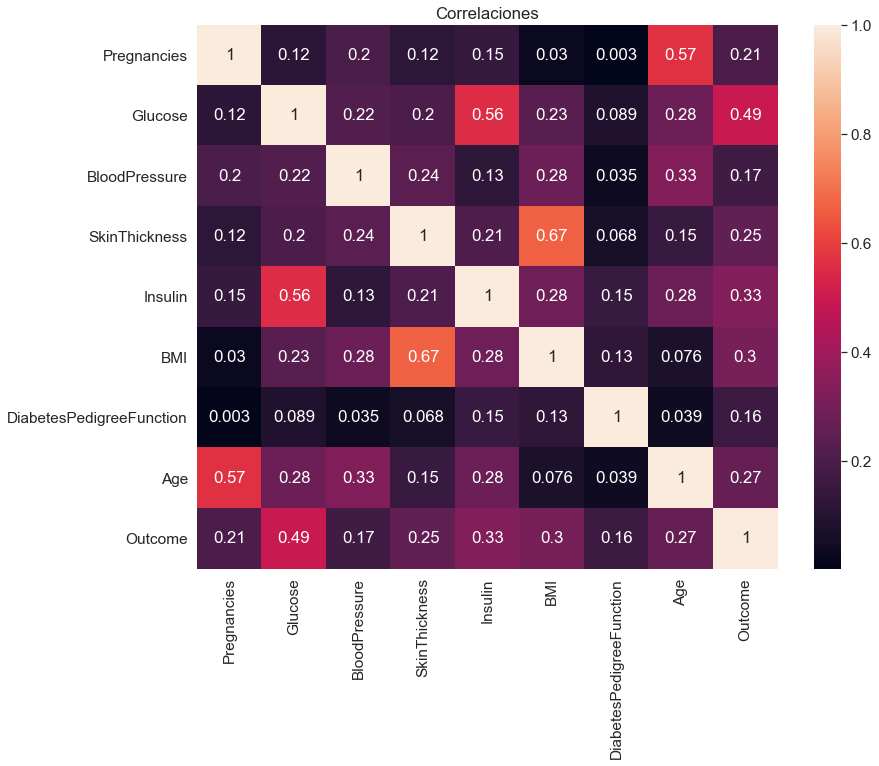

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
_ = sns.heatmap(corr_matrix, annot=True, ax=ax)
ax.set_title('Correlaciones')
plt.show()

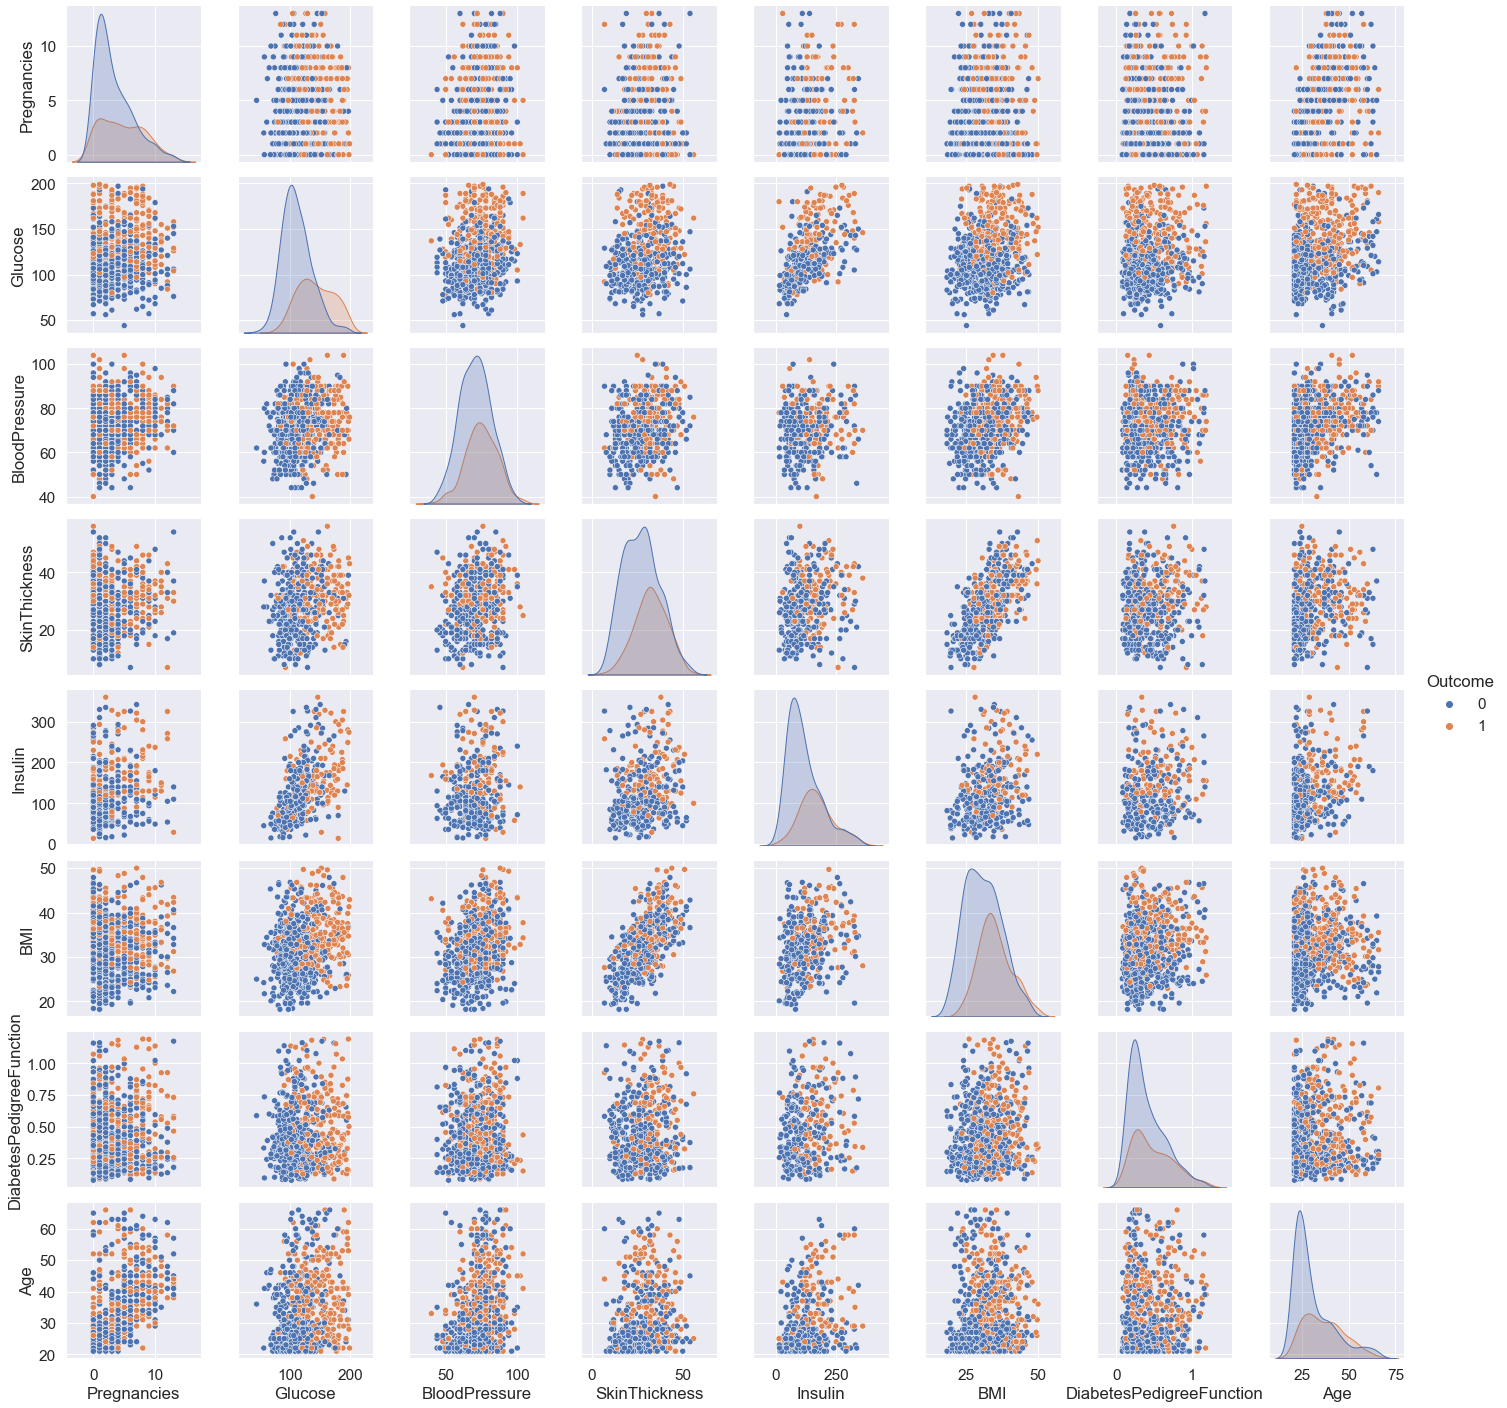

In [49]:
sns.pairplot(df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age'] )